In [ ]:
# majority of code from https://medium.com/bitgrit-data-science-publication/building-an-image-classification-model-with-pytorch-from-scratch-f10452073212

import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

In [ ]:
# load in train and test datasets
# python image library of range [0, 1] 
# transform them to tensors of normalized range[-1, 1]

transform = transforms.Compose( # composing several transforms together
    [transforms.ToTensor(), # to tensor object
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean = 0.5, std = 0.5

# set batch_size
batch_size = 4

# set number of workers
num_workers = 2

# load train data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

# load test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

# put 10 classes into a set
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


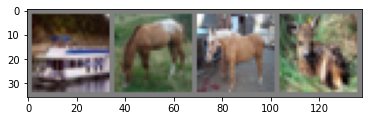

ship horse horse deer


In [ ]:
# show example images from dataset
def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get random training images with iter function
dataiter = iter(trainloader)
images, labels = next(dataiter)

# call function on our images
imshow(torchvision.utils.make_grid(images))

# print the class of the image
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  car horse horse deer


In [ ]:
# neural network
class Net(nn.Module):
    ''' Models a simple Convolutional Neural Network'''
	
    def __init__(self):
      ''' initialize the network '''
      super(Net, self).__init__()
# 3 input image channel, 6 output channels, 
# 5x5 square convolution kernel
      self.conv1 = nn.Conv2d(3, 6, 5)
# Max pooling over a (2, 2) window
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(6, 16, 5) 
      self.fc1 = nn.Linear(16 * 5 * 5, 120)# 5x5 from image dimension
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
      ''' the forward propagation algorithm '''
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 16 * 5 * 5)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# whatever you are timing goes here
end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print('Finished Training')
print(start.elapsed_time(end))  # milliseconds

[1,  2000] loss: 1.222
[1,  4000] loss: 1.233
[1,  6000] loss: 1.219
[1,  8000] loss: 1.213
[1, 10000] loss: 1.229
[1, 12000] loss: 1.215
[2,  2000] loss: 1.145
[2,  4000] loss: 1.129
[2,  6000] loss: 1.134
[2,  8000] loss: 1.143
[2, 10000] loss: 1.126
[2, 12000] loss: 1.135
[3,  2000] loss: 1.063
[3,  4000] loss: 1.054
[3,  6000] loss: 1.065
[3,  8000] loss: 1.080
[3, 10000] loss: 1.076
[3, 12000] loss: 1.106
[4,  2000] loss: 0.999
[4,  4000] loss: 1.012
[4,  6000] loss: 1.018
[4,  8000] loss: 1.034
[4, 10000] loss: 1.029
[4, 12000] loss: 1.039
[5,  2000] loss: 0.934
[5,  4000] loss: 0.952
[5,  6000] loss: 0.975
[5,  8000] loss: 0.996
[5, 10000] loss: 1.010
[5, 12000] loss: 0.993
[6,  2000] loss: 0.909
[6,  4000] loss: 0.936
[6,  6000] loss: 0.948
[6,  8000] loss: 0.938
[6, 10000] loss: 0.948
[6, 12000] loss: 0.962
[7,  2000] loss: 0.866
[7,  4000] loss: 0.880
[7,  6000] loss: 0.900
[7,  8000] loss: 0.928
[7, 10000] loss: 0.921
[7, 12000] loss: 0.915
[8,  2000] loss: 0.839
[8,  4000] 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)# reloadnet = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

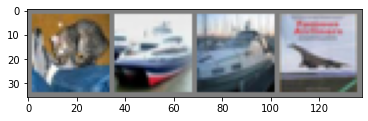

cat ship ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))

# print the class of the image
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  ship ship ship ship


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %
